You can get the Traffic_Crashes_-_Crashes.csv from https://data.cityofchicago.org/Transportation/Traffic-Crashes-Crashes/85ca-t3if

In [1]:
import pandas as pd

data = pd.read_csv('Traffic_Crashes_-_Crashes.csv')
crashes = data[['CRASH_TYPE', 'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'ROADWAY_SURFACE_COND']]
crashes = crashes.dropna()

In [2]:
crashes['CRASH_TYPE'].unique()

array(['INJURY AND / OR TOW DUE TO CRASH', 'NO INJURY / DRIVE AWAY'],
      dtype=object)

In [3]:
crashes['WEATHER_CONDITION'].unique()

array(['CLEAR', 'CLOUDY/OVERCAST', 'UNKNOWN', 'SNOW', 'RAIN',
       'FREEZING RAIN/DRIZZLE', 'OTHER', 'FOG/SMOKE/HAZE', 'SLEET/HAIL',
       'BLOWING SNOW', 'SEVERE CROSS WIND GATE',
       'BLOWING SAND, SOIL, DIRT'], dtype=object)

In [4]:
crashes['LIGHTING_CONDITION'].unique()

array(['DAYLIGHT', 'DARKNESS, LIGHTED ROAD', 'UNKNOWN', 'DARKNESS',
       'DAWN', 'DUSK'], dtype=object)

In [5]:
crashes['ROADWAY_SURFACE_COND'].unique()

array(['DRY', 'UNKNOWN', 'SNOW OR SLUSH', 'WET', 'ICE', 'OTHER',
       'SAND, MUD, DIRT'], dtype=object)

In [6]:
#Preprocessing (changing all strings/multivalue columns to numberical values)
crashes['CRASH_TYPE'] = crashes['CRASH_TYPE'].replace({'INJURY AND / OR TOW DUE TO CRASH' : 0, 'NO INJURY / DRIVE AWAY' : 1})
crashes['WEATHER_CONDITION'] = crashes['WEATHER_CONDITION'].replace({'CLEAR' : 0, 'CLOUDY/OVERCAST' : 1, 'UNKNOWN' : 2, 'SNOW' : 3, 'RAIN' : 4,
       'FREEZING RAIN/DRIZZLE' : 5, 'OTHER' : 6, 'FOG/SMOKE/HAZE' : 7, 'SLEET/HAIL' : 8,
       'BLOWING SNOW' : 9, 'SEVERE CROSS WIND GATE' : 10,
       'BLOWING SAND, SOIL, DIRT' : 11})
crashes['LIGHTING_CONDITION'] = crashes['LIGHTING_CONDITION'].replace({'DAYLIGHT' : 0, 'DARKNESS, LIGHTED ROAD' : 1, 'UNKNOWN' : 2, 'DARKNESS' : 3,
       'DAWN' : 4, 'DUSK' : 5})
crashes['ROADWAY_SURFACE_COND'] = crashes['LIGHTING_CONDITION'].replace({'DRY' : 0, 'UNKNOWN' : 1, 'SNOW OR SLUSH' : 2, 'WET' : 3, 'ICE' : 4, 'OTHER' : 5,
       'SAND, MUD, DIRT' : 6})
crashes.head()

,CRASH_TYPE,WEATHER_CONDITION,LIGHTING_CONDITION,ROADWAY_SURFACE_COND
0,0,0,0,0
1,1,0,0,0
2,1,0,1,1
3,1,0,0,0
4,1,0,0,0


In [7]:
#Creating train and test sets
from sklearn.model_selection import train_test_split
dfWithoutClassification = crashes.drop(['CRASH_TYPE'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(dfWithoutClassification,crashes['CRASH_TYPE'],test_size=0.2, train_size=0.8,random_state=1)

print(f'The original dataset contains {crashes.shape[0]} examples in total.')
print(f'The training set contains {X_train.shape[0]} examples.')
print(f'The testing set contains {X_test.shape[0]} examples.')

The original dataset contains 667886 examples in total.
The training set contains 534308 examples.
The testing set contains 133578 examples.


In [8]:
#Using Naive Bayes
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()
y_pred = NB.fit(X_train,y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 133578 points : 35150


Accuracy Score:  0.7368578658162273 
 Confusion Matrix:  [[  392 34504]
 [  646 98036]] 
 F1 Score:  0.8479815934469904


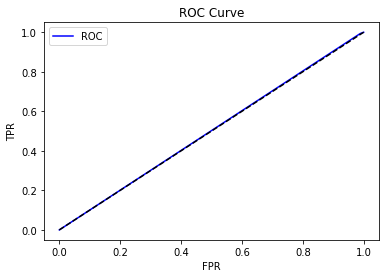

AUC Score is:  0.502343549606928


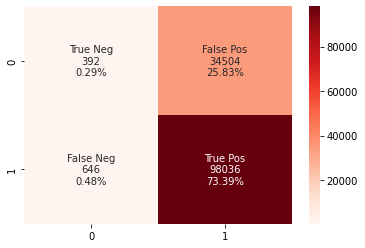

In [9]:
import sklearn.metrics
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='blue', label='ROC')
    plt.plot([0, 1], [0, 1], color='black', linestyle='--')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

acc = sklearn.metrics.accuracy_score(y_test,y_pred)
cm = sklearn.metrics.confusion_matrix(y_test, y_pred)
f1 = sklearn.metrics.f1_score(y_test, y_pred)
print("Accuracy Score: ", acc, "\n Confusion Matrix: ", cm, "\n F1 Score: ", f1)

fpr, tpr, thresholds = roc_curve(y_test,y_pred, pos_label=1)
plot_roc_curve(fpr, tpr)

#creating confusion matrix visualization
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Reds')
AUC_score = roc_auc_score(y_test,y_pred)
print("AUC Score is: ", AUC_score)

So the Model gave a Type 1 error of 25.83% and a Type 2 error of 0.48%.

The Type 1 error is more severe because we don't want to falsely assume that there will be no injury or towing when in fact there was a chance of it.

The F1 Score: 0.8479815934469904 is the Harmonic Mean of precision and recall. The closer it is to 1 the better the model, since it is 0.847 this must be a good model (AKA the measure of the models accuracy on the dataset).

The ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. It graphs it on TPR(True Positive Rate) and FPR(False Positive Rate)

The AUC Score is: 0.502343549606928 is the area under the curve of the ROC graph. It is an aggregate measure of performance across all possible classification thresholds. One way of interpreting AUC is as the probability that the model ranks a random positive example more highly than a random negative example. Since the score is .5 that means that the model has predictions that are 50% right and 50% wrong.

It is interesting that the AUC tells us that the model is right 50% of the time while the accuracy of the model itself is 0.7368578658162273.

In [10]:
NB.predict([[3, 1, 4]]) #SNOW, DARKNESS_LIGHTED_ROAD, ICE

/home/isoni/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([1])

In [11]:
NB.predict([[0, 0, 0]]) #CLEAR, DAYLIGHT, DRY

/home/isoni/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([1])

In [12]:
NB.predict([[9, 3, 3]]) #BLOWING SNOW, DARKNESS, WET

/home/isoni/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([0])

The NB model predicts that cars in the following conditions:

SNOW, DARKNESS_LIGHTED_ROAD, ICE has NO INJURY / DRIVE AWAY

CLEAR, DAYLIGHT, DRY has NO INJURY / DRIVE AWAY

BLOWING SNOW, DARKNESS, WET has INJURY AND / OR TOW DUE TO CRASH
